In [10]:
def sum_of_squares(v):	# linear_algebra.py 코드에서 임포트 하는 대신 여기에 코딩
    """v_1 * v_1 + … + v_n * v_n"""
    return dot(v, v)

def dot(v, w):		 # linear_algebra.py 코드에서 임포트 하는 대신 여기에 코딩
    """v_1 * w_1 + … + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
#from linear_algebra import sum_of_squares, dot # linear_algebra.py 코드에서 임포트
import math
import numpy as np
import matplotlib as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


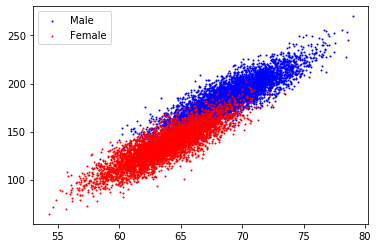

In [24]:
import csv
f = open('height-weight.csv')
A=[]
B=[]
for row in csv.reader(f):
    A.append(float(row[1]))
    B.append(float(row[2]))

f.close()

ablue=A[:5000]
bblue=B[:5000]
ared=A[5000:]
bred=B[5000:]
plt.scatter(ablue,bblue,c='b',s=1,label="Male")
plt.scatter(ared,bred,c='r',s=1,label="Female")
plt.legend(["Male","Female"])
plt.show()

In [27]:
def mean(x): 
    return sum(x) / len(x)

mean(A)
mean(B)

# Numpy version
np.mean(A)
np.mean(B)

66.36755975482124

161.44035683283076

66.36755975482124

161.44035683283076

In [28]:
# 데이터의 중앙에 있는 값(홀수) 또는 중앙에 있는 두 값의 평균(짝수)
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(A)
median(B)
# Numpy version
np.median(A)
np.median(B)

66.31807008178464

161.21292769948298

66.31807008178464

161.21292769948298

In [29]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(A, i * 0.01))
for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(B, i * 0.01))
# Numpy version
np.percentile(A, [i for i in range(0,100,25)])
np.percentile(B, [i for i in range(0,100,25)])

0.00 Percentage value 54.2631333250971
0.25 Percentage value 63.5058944615779
0.50 Percentage value 66.3182407416543
0.75 Percentage value 69.1763161496092
0.00 Percentage value 64.700126712753
0.25 Percentage value 135.819093790461
0.50 Percentage value 161.223964804125
0.75 Percentage value 187.187093632233


array([54.26313333, 63.50562048, 66.31807008, 69.17426173])

array([ 64.70012671, 135.81805131, 161.2129277 , 187.16952487])

In [37]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
a=[]
b=[]
for i in range (len(A)):
    a.append(int(A[i]))
for i in range (len(B)):
    b.append(int(B[i]))
mode(a)
mode(b)

[67]

[142]

In [38]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(A)
data_range(B)

np.max(A) - np.min(A)
np.max(B) - np.min(B)

24.735609021292504

205.289571792353

24.735609021292504

205.289571792353

In [39]:
# Mean - value

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(A)
variance(B)
%timeit variance(A) 
%timeit np.var(A) # 일반적인 분산 연산도 numpy가 빠름
%timeit variance(B) 
%timeit np.var(B)

14.803472640140773

1030.9518554353895

5.97 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
454 µs ± 184 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.17 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
493 µs ± 183 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(A)

np.std(A, dtype=np.float64)

standard_deviation(B)

np.std(B, dtype=np.float64) 

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(A)
interquartile_range(B)

3.847528120773229

3.84733573955754

32.1084390065196

32.106833544431716

5.670421688031304

51.36799984177199

In [43]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(A,B)

np.cov(A,B)

114.24265644646307

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

In [44]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(A,B)

np.cov(A,B)

114.24265644646307

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

0.9247562987409147

array([[1.       , 0.9247563],
       [0.9247563, 1.       ]])

[0, 88.9987423463896, 0, 279.989698505106]

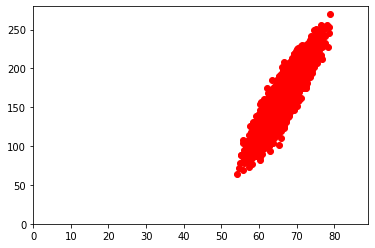

In [45]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
correlation(A, B)

np.corrcoef(A, B)

plt.plot(A, B, 'ro')
plt.axis([0,max(A)+10,0,max(B) +10 ])
plt.show()